En la siguiente sección se investigará y discutirá la pregunta:
¿Es posible predecir el género musical mediante los otros atributos de la tabla?
Para ello se utilizaran distinas técnicas de preprocesamiento y se usarán tres técnicas de clasificación:
    
    -K neighbors algorithm
    -Random Forest
    -Support Vector Machine

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score, confusion_matrix,classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler



In [9]:

df_spotify = pd.read_csv('../data/data_principal.csv', encoding="UTF-8")
df = df_spotify.copy()

Se limpia el data frame de duplicados y valores Null.

In [10]:
df_spotify.drop(['Unnamed: 0','track_id'], axis = 1, inplace = True)
df_spotify.shape
df_spotify.info()
df_spotify.nunique()
df_spotify_sin_duplicados = df_spotify.drop_duplicates()
df_spotify_limpio = df_spotify_sin_duplicados.dropna()
df_spotify_kneighbors = df_spotify_limpio.copy()
df_spotify_forest = df_spotify_limpio.copy()
print(f"Tamaño del DataFrame original: {len(df_spotify)}")
print(f"Tamaño del DataFrame después de eliminar duplicados: {len(df_spotify_sin_duplicados)}")
df_spotify_limpio.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

,count,mean,std,min,25%,50%,75%,max
popularity,113422.0,33.359674,22.269626,0.000,17.0000,35.000000,50.000000,100.000
duration_ms,113422.0,228101.139461,106450.772433,8586.000,174170.0000,213016.000000,261600.000000,5237295.000
danceability,113422.0,0.567113,0.173402,0.000,0.4560,0.580000,0.695000,0.985
energy,113422.0,0.642174,0.251031,0.000,0.4730,0.685000,0.854000,1.000
key,113422.0,5.309332,3.559767,0.000,2.0000,5.000000,8.000000,11.000
loudness,113422.0,-8.242913,5.011931,-49.531,-9.9980,-6.996000,-5.001000,4.532
mode,113422.0,0.637681,0.480673,0.000,0.0000,1.000000,1.000000,1.000
speechiness,113422.0,0.084697,0.105803,0.000,0.0359,0.048900,0.084575,0.965
acousticness,113422.0,0.314075,0.331943,0.000,0.0168,0.168000,0.596000,0.996
instrumentalness,113422.0,0.155802,0.309314,0.000,0.0000,0.000041,0.048700,1.000


Comenzaremos aplicando la técnica de K-Neighbors. Para ello se tiene que considerar que este algoritmo no funciona bien con muchas dimensiones y se deben escalar los datos. Para lo anterior utilizaremos maxMinScaler de Sickit. Además, debemos buscar el mejor K.

In [11]:
##Escalando los datos y eliminando atributos para probar K Neighbors

atributos_neighbors = [ 'tempo', 'danceability', 'loudness', 'energy','speechiness','acousticness','duration_ms']
y = df_spotify_kneighbors['track_genre']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_spotify_kneighbors[atributos_neighbors])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
neigh_1 = KNeighborsClassifier()
##Buscamos el mejor K
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(neigh_1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"El mejor valor de k encontrado mediante validación cruzada es: {best_k}")
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)

f1_1= accuracy_score(y_test, y_pred)
#prueba con weigts
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
neigh_2 = KNeighborsClassifier(20, weights='distance')

neigh_2.fit(X_train_2, y_train_2)

y_pred_2 = neigh_2.predict(X_test_2)
f1_2= accuracy_score(y_test, y_pred_2)

print(f"F1 para kneighbors sin weigths: {f1_1}")
print(f"F1 para kneighbors con weigths: {f1_2}")


El mejor valor de k encontrado mediante validación cruzada es: 1
F1 para kneighbors sin weigths: 0.15261185805598412
F1 para kneighbors con weigths: 0.16424950407758432


Ahora probaremos con Random Forest. Primero veremos el modelo sin procesar los datos.

In [13]:
##Primer intento sin procesar los datos

atributos = [ 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

X = df_spotify_forest[atributos] 
y = df_spotify_forest['track_genre']


X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5,class_weight='balanced', random_state=42)

rfc.fit(X_train_3, y_train_3)

y_pred_3 = rfc.predict(X_test_3)

print(f1_score(y_test_3, y_pred_3, average='macro'))

class_report = classification_report(y_test_3, y_pred_3)
print(class_report)


0.3122298622984759
                   precision    recall  f1-score   support

         acoustic       0.23      0.21      0.22       200
         afrobeat       0.39      0.38      0.38       200
         alt-rock       0.04      0.05      0.04       198
      alternative       0.08      0.08      0.08       199
          ambient       0.32      0.33      0.32       200
            anime       0.21      0.14      0.17       200
      black-metal       0.52      0.58      0.55       199
        bluegrass       0.39      0.55      0.45       199
            blues       0.16      0.11      0.13       199
           brazil       0.10      0.09      0.09       200
        breakbeat       0.55      0.49      0.52       200
          british       0.14      0.07      0.09       200
         cantopop       0.27      0.27      0.27       200
    chicago-house       0.57      0.54      0.56       200
         children       0.49      0.46      0.48       199
            chill       0.20      0.

Estos números no funcionan por lo que tendremos que hacer un preprocesamiento más exhaustivo. Disminuiremos las clases de géneros con un diccionario y luego escalaremos los datos con StandarScaler. Utilzaremos LabEncoder para transformar las variables categóricas a números.

In [14]:
##Creamos un diccionario de géneros, agrupando los géneros más parecidos entre sí.
dic_generos = {
    'latin': ['latin', 'latino', 'reggaeton', 'spanish', 'sertanejo', 'samba', 'tango','brazil', 'forro', 'salsa','mpb'],
    'rock_clasico' :['rock', 'alt-rock', 'rock-n-roll', 'garage', 'rockabilly', 'psych-rock', 'j-rock'],
    'metal': ['death-metal', 'black-metal', 'heavy-metal', 'metal-core', 'grindcore', 'metal','metalcore'],
    'rock_intenso' : ['punk', 'punk-rock', 'hardcore', 'grunge', 'emo', 'goth', 'hard-rock'],
    'pop': [ 'pop', 'world-music', 'pop-film', 'power-pop','british'],
    'pop-asia':['k-pop', 'j-pop', 'mandopop', 'cantopop', 'j-idol', 'j-dance'],
    'hiphop': ['trip-hop', 'hip-hop'],
    'disco': ['groove', 'dance', 'dancehall','disco'],
    'tech_club' : ['house', 'deep-house', 'minimal', 'minimal-techno','techno', 'chicago-house', 'detroit-techno', 'electro', 'club', 'hardstyle','edm'],
    'tech_exp' : ['dubstep', 'idm', 'breakbeat', 'electronic', 'industrial','afrobeat', 'drum-and-bass', 'dub', 'party'],
    'chill': ['study', 'ambient', 'acoustic', 'sleep', 'chill', 'trance', 'new-age','progressive-house','sad'],
    'reggae': ['ska', 'reggae','dancehall'],
    'classic': ['opera', 'classical', 'piano','gospel','show-tunes'],
    'kids': ['kids', 'disney', 'children'],
    'country': ['bluegrass', 'honky-tonk','country'],
    'blues': ['soul', 'funk', 'blues','r-n-b','jazz'],
    'romance': ['romance','singer-songwriter','songwriter'],
    'folklore': ['folk', 'turkish', 'iranian','indian','pagode','german','swedish','malay','french'],
    'other':['happy','comedy', 'guitar','anime'],
    'indie':['indie','alternative','indie-pop','synth-pop']
}

dic_generos_numerico = {}
i = 0
for genero_principal, subgeneros in dic_generos.items():
    dic_generos_numerico[genero_principal] = i
    i += 1

print(dic_generos_numerico)


mapeo_directo = {}
for genero_general, subgeneros in dic_generos.items():
    for sub in subgeneros:
        mapeo_directo[sub] = genero_general

df_spotify_forest['genero_general'] = df_spotify_forest['track_genre'].map(mapeo_directo)

df_spotify_forest['genero_numeric'] = df_spotify_forest['genero_general'].map(dic_generos_numerico)

df_spotify_filtrado = df_spotify_forest.dropna(subset=['genero_numeric']).copy()
df_spotify_filtrado['genero_numeric'] = df_spotify_filtrado['genero_numeric'].astype(int)

# Imprimir el DataFrame resultante (con la nueva columna numérica)
#print(df_spotify_filtrado)


#print("\nDistribución de los géneros numéricos:")
#print(df_spotify_filtrado['genero_numeric'].value_counts().sort_index())
df_spotify_filtrado.head()

{'latin': 0, 'rock_clasico': 1, 'metal': 2, 'rock_intenso': 3, 'pop': 4, 'pop-asia': 5, 'hiphop': 6, 'disco': 7, 'tech_club': 8, 'tech_exp': 9, 'chill': 10, 'reggae': 11, 'classic': 12, 'kids': 13, 'country': 14, 'blues': 15, 'romance': 16, 'folklore': 17, 'other': 18, 'indie': 19}


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genero_general,genero_numeric
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,chill,10
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,chill,10
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,chill,10
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,chill,10
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,chill,10


Ya tenemos menos clases a las cuales clasificar, ahora tenemos que pensar en qué necesita Random Forest para mejorar su rendimiento. Este modelo funcionará mejor para los datos numéricos por lo que transformaremos los datos categóricosa numéricos. 

In [15]:

##Nos quedamos con el género musical en forma numérica
df_spotify_filtrado.drop(['genero_general','track_genre'], axis = 1, inplace = True)
##guardamos las columnas objects (categoricas)

cat_cols = df_spotify_filtrado.select_dtypes(include=['object']).columns.to_list()
#guardamos als columnas numéricas

num_cols = [col for col in df_spotify_filtrado.columns if col not in cat_cols]


In [16]:
df_spotify_filtrado[cat_cols] = df_spotify_filtrado[cat_cols].apply(LabelEncoder().fit_transform)
y = df_spotify_filtrado['genero_numeric']
X=df_spotify_filtrado.drop(['genero_numeric'], axis = 1)
X.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,10357,8100,11741,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,3287,14796,22528,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,12397,39162,60774,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,14839,8580,9580,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,5255,16899,25689,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [17]:
sc = StandardScaler()
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.593473,-1.076002,-1.179561,1.780025,0.024094,-0.305757,0.627949,-0.721723,-1.210571,0.298671,-1.326648,0.551056,-0.849169,-0.503701,0.758030,0.928727,-1.143041,0.221663
1,-1.372576,-0.577621,-0.664145,0.971746,-0.737350,-0.305757,-0.848393,-1.896881,-1.210571,-1.794144,0.753779,-0.079366,1.837447,-0.503686,-0.591193,-0.799417,-1.490966,0.221663
2,-0.368668,1.235930,1.163295,1.061555,-0.162284,-0.305757,-0.744588,-1.128049,-1.491490,-0.297509,0.753779,-0.274069,-0.313533,-0.503704,-0.507195,-1.366465,-1.529568,0.221663
3,-0.099563,-1.040276,-1.282816,1.690217,-0.245825,-0.305757,-1.736505,-2.320735,-1.491490,-2.049536,0.753779,-0.457431,1.780208,-0.503475,-0.428446,-1.277743,1.987317,-2.092751
4,-1.155705,-0.421096,-0.513109,2.184165,-0.274759,-0.305757,0.293465,-0.793428,-0.929652,-0.286934,0.753779,-0.303369,0.466725,-0.503704,-0.686216,-1.185164,-0.074309,0.221663


In [18]:
X_train,X_test,y_train,y_test=train_test_split(df_X_scaled,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)



0.47396335648537996


Finalmente, usando el modelo SVM los resultados fueron los siguientes.

In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc)

Notamos que la predicción utilizando el método de Random Forest fue la que dio mejores resultados. Observemos con una matriz de confusión los resultados.

In [19]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.69      0.58      2129
           1       0.39      0.35      0.37      1378
           2       0.59      0.71      0.65      1219
           3       0.41      0.48      0.45      1418
           4       0.44      0.40      0.42      1010
           5       0.69      0.62      0.65      1173
           6       0.31      0.11      0.16       428
           7       0.27      0.16      0.21       589
           8       0.55      0.65      0.60      1999
           9       0.52      0.58      0.55      1872
          10       0.55      0.61      0.58      1817
          11       0.26      0.15      0.19       600
          12       0.48      0.47      0.47       964
          13       0.69      0.54      0.61       624
          14       0.68      0.61      0.64       608
          15       0.48      0.35      0.41      1040
          16       0.67      0.74      0.70       548
          17       0.42    

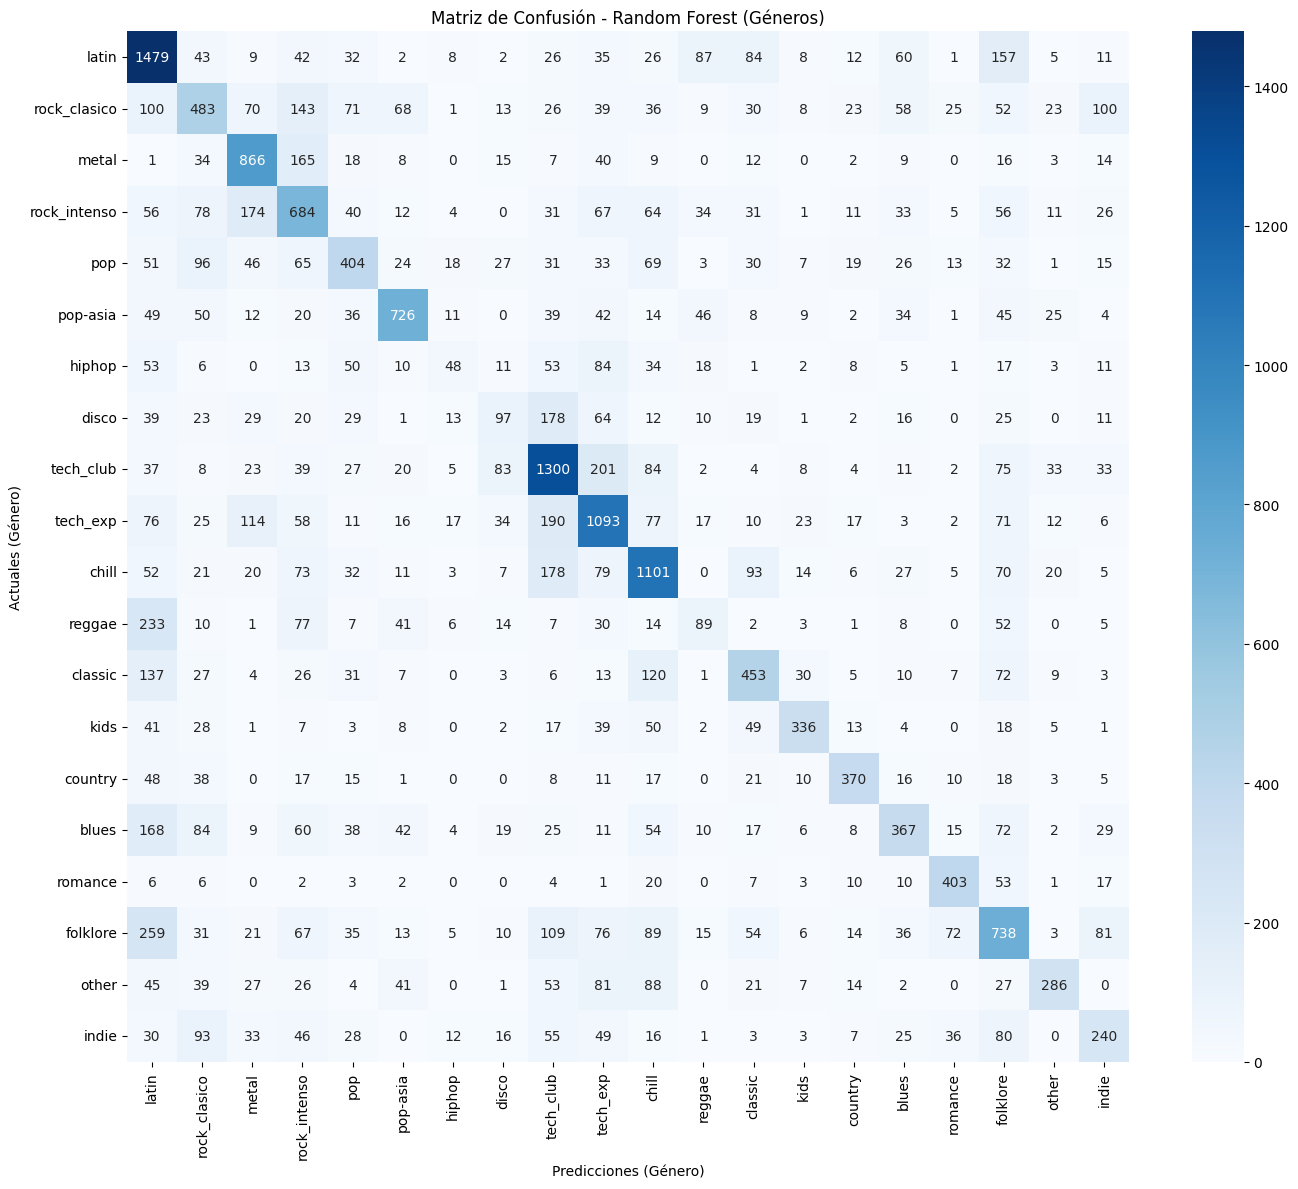

Macro F1 Score: 0.47396335648537996


In [20]:
cm = confusion_matrix(y_test, y_pred)

##Traducimos los género numéricos a nombres generales.
dic_generos_numerico = {'latin': 0, 'rock_clasico': 1, 'metal': 2, 'rock_intenso': 3, 'pop': 4, 'pop-asia': 5, 'hiphop': 6, 'disco': 7, 'tech_club': 8, 'tech_exp': 9, 'chill': 10, 'reggae': 11, 'classic': 12, 'kids': 13, 'country': 14, 'blues': 15, 'romance': 16, 'folklore': 17, 'other': 18, 'indie': 19}
dic_numeros_genero = {v: k for k, v in dic_generos_numerico.items()}
class_names = [dic_numeros_genero[i] for i in sorted(dic_numeros_genero.keys())]
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.title('Matriz de Confusión - Random Forest (Géneros)')
plt.xlabel('Predicciones (Género)')
plt.ylabel('Actuales (Género)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

acc = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {acc}")

Se obtuvo un mejor score utilizando todos los atributos de la tabla. Ahora, observaremos las correlaciones entre atributos y probaremos predecir el género con menos atributos.

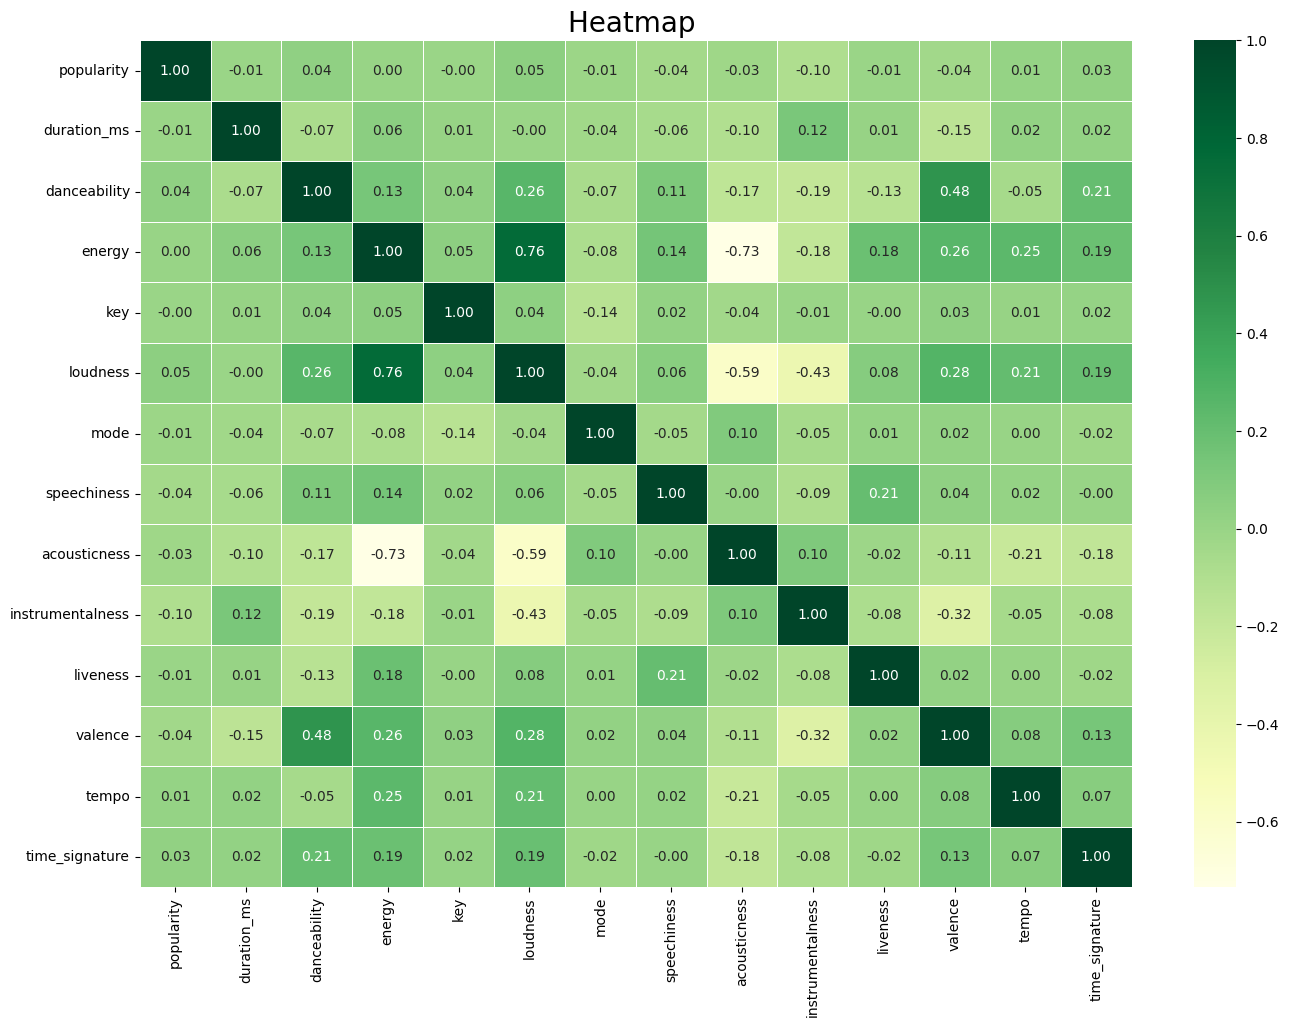

In [21]:
##Estudio de las correlaciones entre atributos

numeric_cols = df_spotify.select_dtypes(include=['number']).columns

f, ax = plt.subplots(figsize=(16, 11))

corr_matrix = df_spotify[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='YlGn', annot=True, fmt=".2f", linewidths=.5)



plt.title('Heatmap ', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Se observa en el Heatmap que Loudness y energy están muy relacionados, por lo que tomaremos solo loudness para hacer la predicción. Asimismo, usaremos solo dancebility, que está correlacionado con valence. Finalmente, vemos que hay una gran correlación negativa entre loudness y acoustiness, por lo que usaremos estos tres atributos para poder predecir el género de una canción.

In [22]:

#prueba modelo con menos atributos
y_new = df_spotify_filtrado['genero_numeric']
X_new=df_spotify_filtrado[['loudness','danceability','acousticness']]
sc2 = StandardScaler()
X_scaled_new=sc2.fit_transform(X_new)
df_X_scaled_new=pd.DataFrame(X_scaled_new,columns=X_new.columns)
df_X_scaled_new.head()

##entrenamos con menos atributos
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(df_X_scaled_new,y_new,test_size=0.20,random_state=42)
rfc_new = RandomForestClassifier(n_estimators=100)
rfc_new.fit(X_train_new, y_train_new)
y_pred_new = rfc_new.predict(X_test_new)
f1_new= f1_score(y_test_new, y_pred_new, average='macro')
print(f1_new)


0.2813827406312511


El rendimiento baja considerablemente. Probemos con otros atributos para la predicción.

In [23]:

y_new_2 = df_spotify_filtrado['genero_numeric']
X_new_2=df_spotify_filtrado[['popularity','loudness','speechiness']]
sc3 = StandardScaler()
X_scaled_new_2=sc3.fit_transform(X_new_2)
df_X_scaled_new_2=pd.DataFrame(X_scaled_new_2,columns=X_new_2.columns)

##entrenamos con menos atributos
X_train_new_2,X_test_new_2,y_train_new_2,y_test_new_2=train_test_split(df_X_scaled_new_2,y_new_2,test_size=0.20,random_state=42)
rfc_new_2 = RandomForestClassifier(n_estimators=100)
rfc_new_2.fit(X_train_new_2, y_train_new_2)
y_pred_new_2 = rfc_new_2.predict(X_test_new_2)
f1_new_2= f1_score(y_test_new_2, y_pred_new_2, average='macro')
print(f1_new_2)

0.2608232447212725


In [ ]:

y_new_3 = df_spotify_filtrado['genero_numeric']
X_new_3 =df_spotify_filtrado[['popularity','loudness','key','instrumentalness','artists','track_name','tempo','valence']]
sc4 = StandardScaler()
X_scaled_new_3=sc4.fit_transform(X_new_3)
df_X_scaled_new_3=pd.DataFrame(X_scaled_new_3,columns=X_new_3.columns)

##entrenamos con menos atributos
X_train_new_3,X_test_new_3,y_train_new_3,y_test_new_3=train_test_split(df_X_scaled_new_3,y_new_3,test_size=0.20,random_state=42)
rfc_new_3 = RandomForestClassifier(n_estimators=100)
rfc_new_3.fit(X_train_new_3, y_train_new_3)
y_pred_new_3 = rfc_new_3.predict(X_test_new_3)
f1_new_3 = f1_score(y_test_new_3, y_pred_new_3, average='macro')
print(f1_new_3)

0.3800001426475391


**Conclusión**: 
Dado que los resultados de predicción presentan índices bajos, es necesario tomar más atributos para poder lograr un procentaje donde el modelo pueda entender mejor la relación entre los atributos y el género. Por lo tanto, se necesitan al menos 10 atributos para que el modelo funcione de forma aceptable.
Un 47% de éxito sigue siendo bajo, por lo que será necesario probar con otros modelos y/o estudiar otro tipo de procesamiento de datos para mejorar la tasa de éxito. 